In [1]:
import  pandas as pd

In [2]:
from sklearn.model_selection import train_test_split

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv('diabetes.csv')
df.head(2)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
X = df.iloc[:,:-1]

y = df.iloc[:,-1] 

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=156,stratify=y)

In [7]:
from sklearn.linear_model import LogisticRegression

In [23]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score,precision_recall_curve,roc_auc_score

def get_clf_eval(y_test,pred):
        confusion = confusion_matrix(y_test,pred)
        accuracy = accuracy_score(y_test,pred)
        precision = precision_score(y_test,pred)
        recall = recall_score(y_test,pred)
        f1 = f1_score(y_test,pred)
        roc_auc = roc_auc_score(y_test,pred)
        print('오차행렬')
        print(confusion)
        print(f'정확도:{accuracy:.4f} 정밀도:{precision:.4f} 재현율:{recall:.4f} F1:{f1:.4f} AUC:{roc_auc:.4f}')

In [9]:
lr_clf = LogisticRegression()
lr_clf.fit(X_train,y_train)
pred= lr_clf.predict(X_test)
get_clf_eval(y_test,pred)

오차행렬
[[88 12]
 [23 31]]
정확도:0.7727 정밀도:0.7209 재현율:0.5741 F1:0.6392


In [10]:
def precision_recall_curve_plot(y_test , pred_proba_c1):
    # threshold ndarray와 이 threshold에 따른 정밀도, 재현율 ndarray 추출. 
    precisions, recalls, thresholds = precision_recall_curve( y_test, pred_proba_c1)
    
    # X축을 threshold값으로, Y축은 정밀도, 재현율 값으로 각각 Plot 수행. 정밀도는 점선으로 표시
    plt.figure(figsize=(8,6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
    plt.plot(thresholds, recalls[0:threshold_boundary],label='recall')
    
    # threshold 값 X 축의 Scale을 0.1 단위로 변경
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    
    # x축, y축 label과 legend, 그리고 grid 설정
    plt.xlabel('Threshold value'); plt.ylabel('Precision and Recall value')
    plt.legend(); plt.grid()
    plt.show()

In [12]:
pred_proba_c1 = lr_clf.predict_proba(X_test)[:,1]

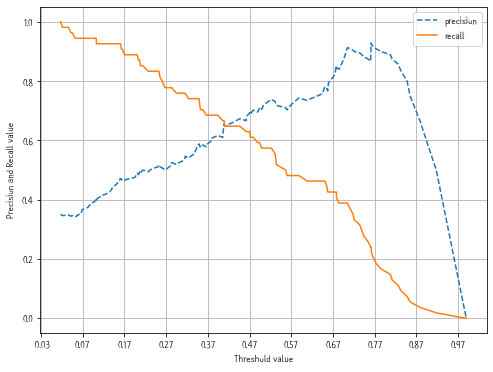

In [13]:
import matplotlib.pyplot as plt
import numpy as np
precision_recall_curve_plot(y_test,pred_proba_c1)

In [14]:
precision_recall_curve( y_test, pred_proba_c1)

(array([0.35064935, 0.34640523, 0.34868421, 0.34437086, 0.34666667,
        0.34228188, 0.34459459, 0.34693878, 0.34931507, 0.35172414,
        0.35416667, 0.35664336, 0.35915493, 0.36170213, 0.36428571,
        0.36690647, 0.36956522, 0.37226277, 0.375     , 0.37777778,
        0.38059701, 0.38345865, 0.38636364, 0.38931298, 0.39230769,
        0.39534884, 0.3984375 , 0.4015748 , 0.4047619 , 0.4       ,
        0.40322581, 0.40650407, 0.40983607, 0.41322314, 0.41666667,
        0.42016807, 0.42372881, 0.42735043, 0.43103448, 0.43478261,
        0.43859649, 0.44247788, 0.44642857, 0.45045045, 0.45454545,
        0.4587156 , 0.46296296, 0.46728972, 0.47169811, 0.46666667,
        0.47115385, 0.46601942, 0.47058824, 0.47524752, 0.48      ,
        0.48484848, 0.48979592, 0.48453608, 0.48958333, 0.49473684,
        0.4893617 , 0.49462366, 0.5       , 0.49450549, 0.5       ,
        0.50561798, 0.51136364, 0.51724138, 0.51162791, 0.50588235,
        0.5       , 0.5060241 , 0.51219512, 0.51

In [15]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


(array([  5.,   0.,   4.,  32., 156., 211., 163.,  95.,  56.,  46.]),
 array([  0. ,  19.9,  39.8,  59.7,  79.6,  99.5, 119.4, 139.3, 159.2,
        179.1, 199. ]),
 <BarContainer object of 10 artists>)

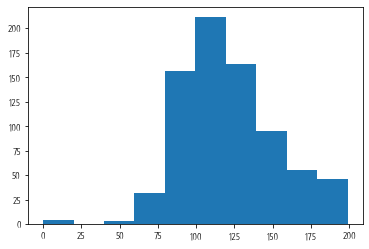

In [16]:
plt.hist(df['Glucose'])

In [17]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [18]:
zero_features = ['Glucose', 'BloodPressure','SkinThickness', 'Insulin','BMI']
total_count = df['Glucose'].count()
for feature in zero_features:
    zero_count = df[df[feature]==0][feature].count()
#     print(feature)
#     print(zero_count)
    print('{} 0건수:{} 퍼센트 {:.2f}%'.format(feature,zero_count,(100*zero_count/total_count)))

Glucose 0건수:5 퍼센트 0.65%
BloodPressure 0건수:35 퍼센트 4.56%
SkinThickness 0건수:227 퍼센트 29.56%
Insulin 0건수:374 퍼센트 48.70%
BMI 0건수:11 퍼센트 1.43%


In [19]:
mean_zero_features = df[zero_features].mean()

In [20]:
df[zero_features] = df[zero_features].replace(0,mean_zero_features)

In [21]:
zero_features = ['Glucose', 'BloodPressure','SkinThickness', 'Insulin','BMI']
total_count = df['Glucose'].count()
for feature in zero_features:
    zero_count = df[df[feature]==0][feature].count()
#     print(feature)
#     print(zero_count)
    print('{} 0건수:{} 퍼센트 {:.2f}%'.format(feature,zero_count,(100*zero_count/total_count)))

Glucose 0건수:0 퍼센트 0.00%
BloodPressure 0건수:0 퍼센트 0.00%
SkinThickness 0건수:0 퍼센트 0.00%
Insulin 0건수:0 퍼센트 0.00%
BMI 0건수:0 퍼센트 0.00%


In [24]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1] 
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=156,stratify=y)
lr_clf = LogisticRegression()
lr_clf.fit(X_train,y_train)
pred= lr_clf.predict(X_test)
get_clf_eval(y_test,pred)
# 오차행렬
# [[88 12]
#  [23 31]]
# 정확도:0.7727 정밀도:0.7209 재현율:0.5741 F1:0.6392

오차행렬
[[89 11]
 [20 34]]
정확도:0.7987 정밀도:0.7556 재현율:0.6296 F1:0.6869 AUC:0.7598


In [25]:
from sklearn.metrics import roc_curve

In [26]:
pred_proba_class1 = lr_clf.predict_proba(X_test)[:,1]
pred_proba_class1

array([0.04002233, 0.21086233, 0.17351643, 0.52873446, 0.4355929 ,
       0.73127582, 0.84541271, 0.15263243, 0.18515182, 0.0992185 ,
       0.67684372, 0.43156236, 0.04758446, 0.40574903, 0.25656991,
       0.09417772, 0.76330412, 0.09088043, 0.5664212 , 0.77703965,
       0.46950548, 0.35614287, 0.06878212, 0.32011032, 0.28335338,
       0.10020083, 0.91239527, 0.77036577, 0.16377626, 0.89975559,
       0.25322097, 0.25883973, 0.10198574, 0.16306135, 0.10176898,
       0.72937366, 0.2234362 , 0.22750541, 0.82239828, 0.65491201,
       0.3964757 , 0.22203573, 0.7027232 , 0.13000163, 0.35325918,
       0.01489721, 0.51341835, 0.08710016, 0.48459231, 0.3268088 ,
       0.30309002, 0.92784697, 0.87998138, 0.06125277, 0.12960398,
       0.45017299, 0.07707262, 0.36683432, 0.33297136, 0.38264164,
       0.20319357, 0.8337169 , 0.32155597, 0.63933666, 0.30131367,
       0.10962857, 0.26678606, 0.7170841 , 0.16133247, 0.7720939 ,
       0.06571305, 0.32977675, 0.12982967, 0.44715059, 0.80859

In [27]:
roc_curve(y_test,pred_proba_class1)

(array([0.  , 0.01, 0.01, 0.02, 0.02, 0.04, 0.04, 0.05, 0.05, 0.07, 0.07,
        0.09, 0.09, 0.11, 0.11, 0.18, 0.18, 0.24, 0.24, 0.25, 0.25, 0.27,
        0.27, 0.29, 0.29, 0.36, 0.36, 0.4 , 0.4 , 0.41, 0.41, 0.44, 0.44,
        0.45, 0.45, 0.52, 0.52, 0.54, 0.54, 0.55, 0.55, 0.62, 0.62, 1.  ]),
 array([0.        , 0.        , 0.16666667, 0.16666667, 0.22222222,
        0.22222222, 0.46296296, 0.46296296, 0.5       , 0.5       ,
        0.51851852, 0.51851852, 0.62962963, 0.62962963, 0.64814815,
        0.64814815, 0.68518519, 0.68518519, 0.7037037 , 0.7037037 ,
        0.72222222, 0.72222222, 0.77777778, 0.77777778, 0.7962963 ,
        0.7962963 , 0.83333333, 0.83333333, 0.85185185, 0.85185185,
        0.87037037, 0.87037037, 0.90740741, 0.90740741, 0.92592593,
        0.92592593, 0.94444444, 0.94444444, 0.96296296, 0.96296296,
        0.98148148, 0.98148148, 1.        , 1.        ]),
 array([1.96994181, 0.96994181, 0.8337169 , 0.83036071, 0.81869821,
        0.80859414, 0.71388087, 

In [28]:
def roc_curve_plot(y_test , pred_proba_c1):
    # 임곗값에 따른 FPR, TPR 값을 반환 받음. 
    fprs , tprs , thresholds = roc_curve(y_test ,pred_proba_c1)

    # ROC Curve를 plot 곡선으로 그림. 
    plt.plot(fprs , tprs, label='ROC')
    # 가운데 대각선 직선을 그림. 
    plt.plot([0, 1], [0, 1], 'k--', label='Random')
    
    # FPR X 축의 Scale을 0.1 단위로 변경, X,Y 축명 설정등   
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    plt.xlim(0,1); plt.ylim(0,1)
    plt.xlabel('FPR( 1 - Sensitivity )'); plt.ylabel('TPR( Recall )')
    plt.legend()
    plt.show()

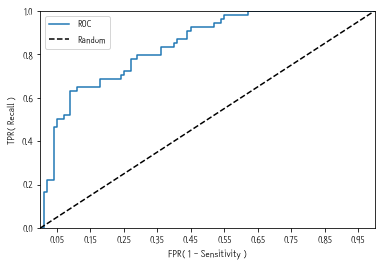

In [29]:
roc_curve_plot(y_test,pred_proba_class1)

In [33]:
def get_eval_by_threshold(y_test , pred_proba_c1, thresholds):
    from sklearn.preprocessing import Binarizer
    # thresholds list객체내의 값을 차례로 iteration하면서 Evaluation 수행.
    for custom_threshold in thresholds:
        binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_c1) 
        custom_predict = binarizer.transform(pred_proba_c1)
        print('임곗값:',custom_threshold)
        get_clf_eval(y_test , custom_predict)

In [32]:
thresholds = [0.3,0.33,0.36,0.39,0.42,0.45,0.48,0.5]
pred_proba = lr_clf.predict_proba(X_test)
get_eval_by_threshold(y_test,pred_proba[:,1].reshape(-1,1),thresholds)

임곗값: 0.3
오차행렬
[[66 34]
 [11 43]]
정확도:0.7078 정밀도:0.5584 재현율:0.7963 F1:0.6565 AUC:0.7281
임곗값: 0.33
오차행렬
[[73 27]
 [13 41]]
정확도:0.7403 정밀도:0.6029 재현율:0.7593 F1:0.6721 AUC:0.7446
임곗값: 0.36
오차행렬
[[75 25]
 [16 38]]
정확도:0.7338 정밀도:0.6032 재현율:0.7037 F1:0.6496 AUC:0.7269
임곗값: 0.39
오차행렬
[[76 24]
 [17 37]]
정확도:0.7338 정밀도:0.6066 재현율:0.6852 F1:0.6435 AUC:0.7226
임곗값: 0.42
오차행렬
[[81 19]
 [17 37]]
정확도:0.7662 정밀도:0.6607 재현율:0.6852 F1:0.6727 AUC:0.7476
임곗값: 0.45
오차행렬
[[85 15]
 [19 35]]
정확도:0.7792 정밀도:0.7000 재현율:0.6481 F1:0.6731 AUC:0.7491
임곗값: 0.48
오차행렬
[[88 12]
 [19 35]]
정확도:0.7987 정밀도:0.7447 재현율:0.6481 F1:0.6931 AUC:0.7641
임곗값: 0.5
오차행렬
[[89 11]
 [20 34]]
정확도:0.7987 정밀도:0.7556 재현율:0.6296 F1:0.6869 AUC:0.7598
